In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("E:\Data Sciences\Sample Data")

# Defining the Objective

# Data Loading

In [ ]:
#read the dataset
df = pd.read_csv('cars_price.csv')
df.head()

# Data Structure

In [ ]:
df.info()

14 column & 2095 rows

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

The data has no null value


# Missing Data

In [ ]:
#nuemerical columns
num_cols=df.select_dtypes(exclude='object').columns
num_cols

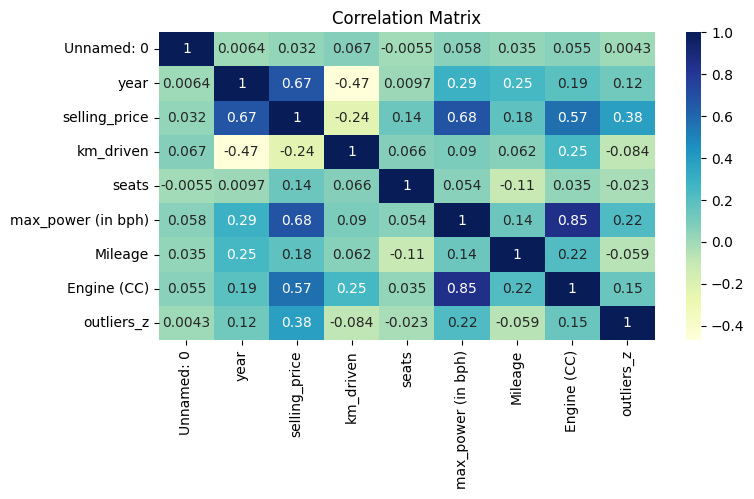

In [17]:
#perform univariate analysis
# Assuming df is the DataFrame you want to analyze

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = df.select_dtypes(exclude='object').columns

# Correlation matrix of numerical columns
plt.figure(figsize=(8, 4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

# Cleaning the Data

## Outliers 
1. visualizations- box, scatter, hist, violins- look for any unusual character
2. summary statistics- 
3. z-scores 
4. IQR method-
5. Domain knowledge
6. Statistical test- rubbs test, dixon q test
7. ML algos-clustering etc

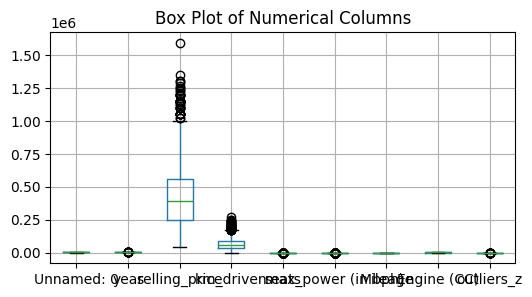

In [24]:
#create box plot of num_cols
df[num_cols].boxplot(figsize=(6,3))
plt.title('Box Plot of Numerical Columns')
plt.show()

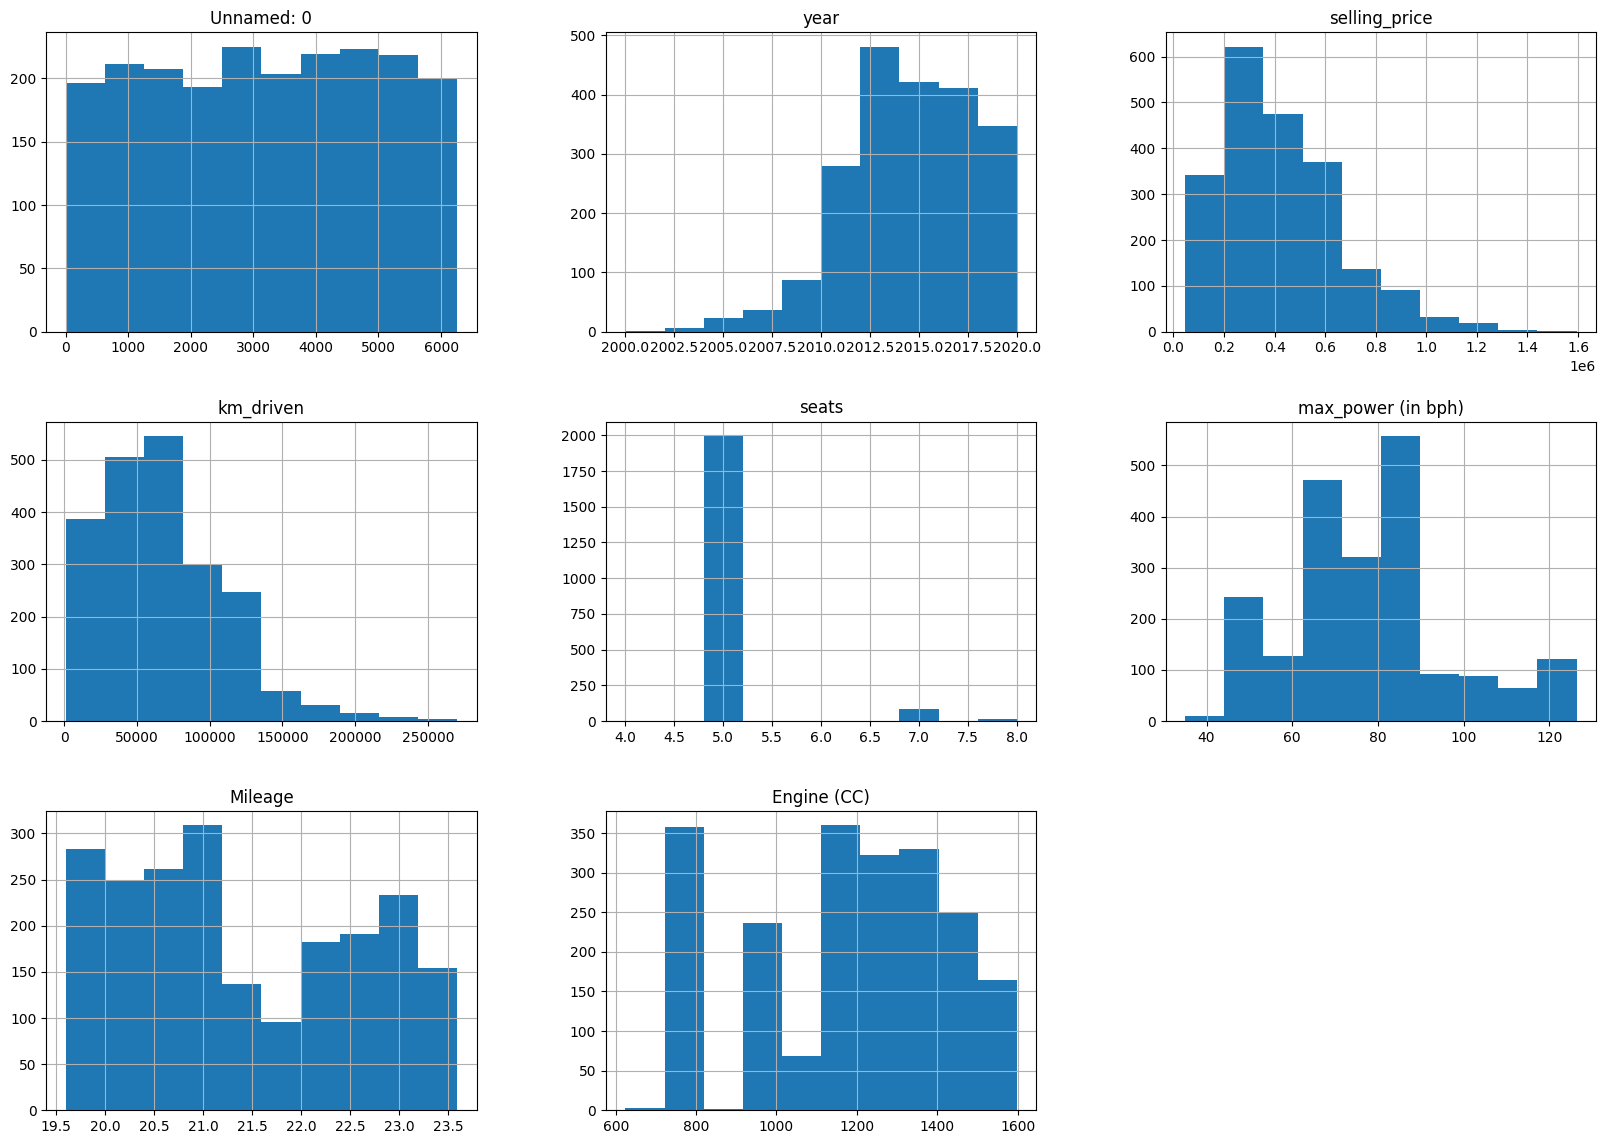

In [25]:
#create histogram of num_cols
df[num_cols].hist(figsize=(20, 14))
plt.title('Histogram of Numerical Columns')
plt.show()

**From box plot and histogram it seems like, selling price and km_driven has outliers. Lets  get into more details with data distribution of these two**

**Identifying Outliers**

In [ ]:
#IQR method
# identifying outliers in the data
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]
outliers_iqr

In [15]:
#identify outliers using zscore 
from scipy import stats

z_scores = stats.zscore(df['selling_price'])
#add boolean column with True if outlier and False if not
df['outliers_z'] = (z_scores > 3) | (z_scores < -3)
df['outliers_z']



0       False
1       False
2       False
3       False
4       False
        ...  
2090    False
2091    False
2092    False
2093    False
2094    False
Name: outliers_z, Length: 2095, dtype: bool

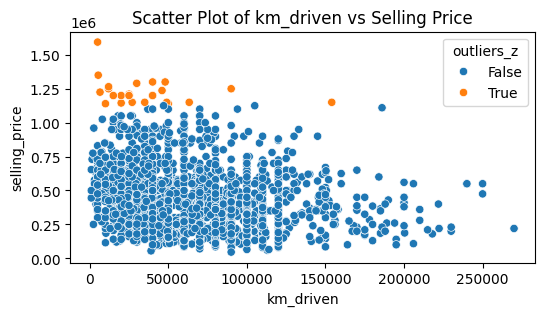

In [16]:
#scatter plot of year vs selling price
plt.figure(figsize=(6,3))
sns.scatterplot(x='km_driven', y='selling_price', hue='outliers_z', data=df)
plt.title('Scatter Plot of km_driven vs Selling Price')
plt.show()

## Data Distribution

1. Checking Distribution
2. Skewness
3. Kurtosis
4. 

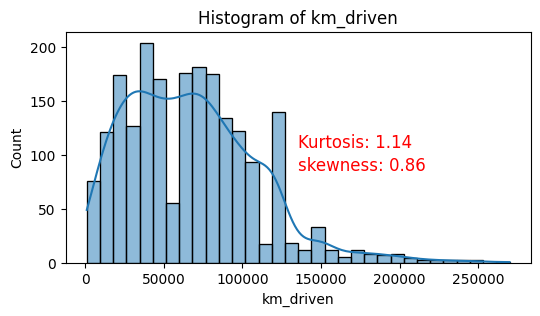

In [29]:
#create histogram of km_driven with kde
plt.figure(figsize=(6, 3))
sns.histplot(x='km_driven', data=df, kde=True)
plt.title('Histogram of km_driven')

# Calculate kurtosis of km_driven
kurtosis = df['km_driven'].kurtosis()
# Annotate with kurtosis value
plt.annotate(f'Kurtosis: {kurtosis:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, color='red')

# Calculate skewness of km_driven
skewness = df['km_driven'].skew()
plt.annotate(f'skewness: {skewness:.2f}', xy=(0.5, 0.4), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

Skewness is a statistical measure that describes the asymmetry or lack of symmetry in a dataset's distribution.

Therfore both km_driven & selloing price are positively skewed.

kurtosis is a statistical measure that tells you about the shape of a distribution. It helps you understand how the distribution's tails (the values at the extremes) and the peak (the highest point) differ from those of a normal distribution.

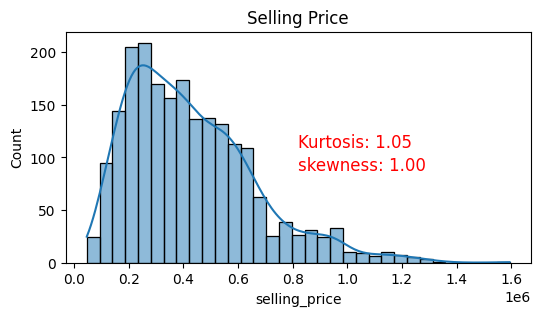

In [31]:
#create histogram of selling price with kde
plt.figure(figsize=(6,3))
sns.histplot(x='selling_price', data=df, kde=True)
plt.title('Selling Price')
# calculate kurtosis and skewness
kurtosis = df['selling_price'].kurtosis()
plt.annotate(f'Kurtosis: {kurtosis:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, color='red')
skewness = df['selling_price'].skew()
plt.annotate(f'skewness: {skewness:.2f}', xy=(0.5, 0.4), xycoords='axes fraction', fontsize=12, color='red')


plt.show()

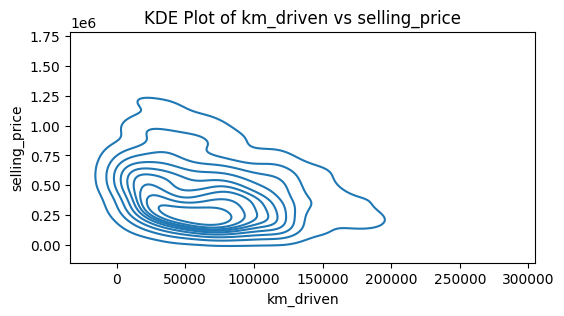

In [13]:
#create kde plot of num_cols
plt.figure(figsize=(6,3))
sns.kdeplot(x='km_driven', y='selling_price', data=df)
plt.title('KDE Plot of km_driven vs selling_price')
plt.show()



selling price and km_driven are inversely correlated

`` From the data distribution, we can see that the data is not evenly distributed. We can apply data normalization and transformation processes if required later on. For the time being, we are moving forward``

# **Bivariate analyses**